In [2]:
import  json
from os import listdir
from os.path import isfile, join
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os

In [37]:
df = pd.read_csv('traindata.csv')

In [67]:
dfdev = pd.read_csv('devdata.csv')

In [75]:
dftest = pd.read_csv('testdata.csv')

deal with html decoding

In [70]:
def html_decode(df):
    df = df.rename(columns={" tweet_text": "tweet_text", " results": "results"})
    from bs4 import BeautifulSoup
    clean_tweet_texts = []
    for i in df['tweet_text']:
        clean_tweet_texts.append(BeautifulSoup(i, 'html.parser').get_text())
    clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
    clean_df['results'] = df['results']
    clean_df['ID'] = df['ID']
    return clean_df

In [ ]:
clean_df = html_decode(df)

In [71]:
dfdev = html_decode(dfdev)

In [76]:
dftest = html_decode(dftest)

In [50]:
clean_df['len'] = [len(t) for t in clean_df.text]

In [52]:
clean_df[clean_df['len']>140]

,text,results,ID,len


In [53]:
train = clean_df

In [73]:
dfdev.to_csv('dev_html_decode.csv', index = None)

In [ ]:
clean_df.to_csv('training_html_decode.csv', index = None)

In [78]:
dftest.to_csv('test_html_decode.csv', index = None)

In [21]:
train = pd.read_csv('training_html_decode.csv')

In [3]:
dev = pd.read_csv('dev_html_decode.csv')

In [4]:
testdata = pd.read_csv('test_html_decode.csv')

check tweets with '?'

In [23]:
qtext = []
lb = []
for i in range(len(train)):
    if '?' in train['text'].iloc[i]:
        qtext.append(train['text'].iloc[i])
        lb.append(train['results'].iloc[i])        

In [24]:
qdf = pd.DataFrame()
qdf['qtext'] = qtext
qdf['label'] = lb

In [31]:
for i in qdf[qdf['label']=='comment']['qtext']:
    print(i)

@jlpauk why would the ferguson PD and STLCO PD release the information they've released and fail to mention that?
@DanteB4u @KatEdmiston Probable cause for what? The alleged robbery that cop wasn't aware of (so it appears) or alleged assault of cop?
“@zellieimani: How many white celebrities have been CAUGHT shoplifting and end up dead in streets? I'll wait. #Ferguson” #truth
@Joyce_Karam @LibyaLiberty No wonder dude upped his game. Seems like men engaged in femicide & sexual assaults in Australia can roam freely?
@MrLewis915 anti-whites ? #lulz
@ABC Animals! Will they get their virgins in hell? Because, that's where they are going!
@orangeseahorse There are pics of "strong arm robbery" clothing description/size of assailant similar BUT cop deadly force? No! @DanteB4u
@jlpauk @Tom_sveb @spants @rui_xu do you not even have a basic understanding why people mistrust police?
@KoszikMeows if i were a cop & he was unarmed ummm hello .. So he must've left his taser in the car ... ?
@cnni 🍵☕cof

In [27]:
qdf['label'].value_counts()

comment    304
query      224
support     65
deny        55
Name: label, dtype: int64

check tweets end with '?'

In [32]:
qtext = []
lb = []
for i in range(len(train)):
    if str(train['text'].iloc[i]).endswith('?'):
        qtext.append(train['text'].iloc[i])
        lb.append(train['results'].iloc[i])        

In [33]:
qdf1 = pd.DataFrame()
qdf1['qtext'] = qtext
qdf1['label'] = lb

In [34]:
qdf1['label'].value_counts()

query      159
comment    146
support     25
deny        22
Name: label, dtype: int64

# data

investigate the training data

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 4 columns):
text       4238 non-null object
results    4238 non-null object
ID         4238 non-null int64
len        4238 non-null int64
dtypes: int64(2), object(2)
memory usage: 132.5+ KB


In [56]:
train.head()

,text,results,ID,len
0,@max843 @DanteB4u @Alasscan_ This shows Micha...,comment,501760642928635904,122
1,@USATODAY Get ready to tweet the address #Spik...,comment,500270212198174720,73
2,@rikermacdaniels @CBCAlerts @CBCNews @JustinTr...,comment,524971210275565568,134
3,@RT_com Just kill them.,comment,552836882770690049,24
4,"@TheAnonMessage2 no, because that would requir...",support,500289931097296897,136


In [57]:
train['results'].value_counts()

comment    2734
support     841
deny        333
query       330
Name: results, dtype: int64

distribution of every class in training data

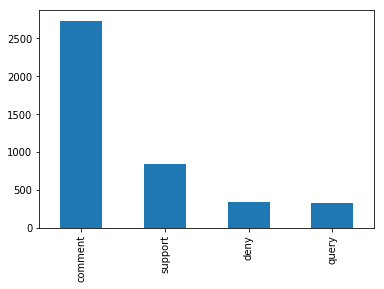

In [38]:
train['results'].value_counts().plot(kind = 'bar')

percentage of each class in the training data set

In [30]:
def data_percent(df):
    print('comment:', (df['results'].value_counts().comment)/len(df))
    print('support:', (df['results'].value_counts().support)/len(df))
    print('deny:', (df['results'].value_counts().deny)/len(df))
    print('query:', (df['results'].value_counts().query)/len(df))

In [58]:
data_percent(train)

comment: 0.6451156205757432
support: 0.19844266163284568
deny: 0.07857479943369514
query: 0.0778669183577159


information about the test set

In [80]:
testdata['results'].value_counts()

comment    778
query      106
support     94
deny        71
Name: results, dtype: int64

In [81]:
data_percent(testdata)

comment: 0.7416587225929456
support: 0.08960915157292659
deny: 0.06768350810295519
query: 0.10104861773117255


In [59]:
train['len'] = [len(t) for t in train.text]

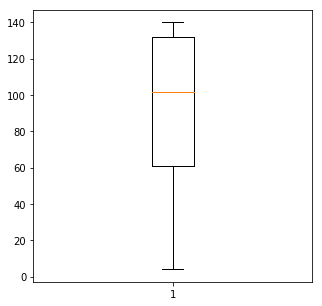

In [60]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(train.len)
plt.show()

In [63]:
for i in train.text:
    print(i)

@max843 @DanteB4u @Alasscan_  This shows Michael paid for cigarillos. No robbery, no crime! Pls RT  http://t.co/ZwYEcGvXya
@USATODAY Get ready to tweet the address #SpikeLee and other vigilantes .
@rikermacdaniels @CBCAlerts @CBCNews @JustinTrudeau your radical Muslims are being funded by American Senate, Israel and Saudia Arabia
@RT_com  Just kill them.
@TheAnonMessage2 no, because that would require reasoning and then if reasoning is applied, no one can be shot. Shoot now, reason later.
@Simon_Cullen @HalaJaber AU GOV and Tony Abbott is responsible for this mess!! AU Gov created the 'Rebels' Frankenstein in Syria!!
@Kiippyy @KEEMSTARx u know theres some fucked up people who wants to see him blow up himself
@jlpauk why would the ferguson PD and STLCO PD release the information they've released and fail to mention that?
@140elect Here are pixs I have. http://t.co/jn6wWj5pVW
@RT_com @SpringboroTea http://t.co/5NjSg1pBSi
@tdgecas yeah posting information about an evolving shooter situati

@theprawnatron @cnnbrk stay stupid and wait be the next victim.   such trash like u cannot blame monsters. U deserve be punished by monsters
@cnni The police r there trying to do a job under very difficult circumstances. We all realize how brave they r and thank them
Good job uber... @mashable: Uber intros surge pricing in downtown Sydney during hostage siege http://t.co/mo8fnvpIkl http://t.co/h4SLlEjuBT”
Sending thoughts and prayers. "@globeandmail: #BREAKING: Shots fired at Parliament Hill. http://t.co/hvTLvS7PF3 http://t.co/0qSanyC0vx”
MT @BreakingNews: Three people appear to escape from Martin Place, Sydney, café, amid hostage situation - @ABCNews http://t.co/JulXUuiJAu”
@DostoevskyShade @140elect 17 is a minor, 18's an adult.  Being big has no relevance.
@dmatthewmillar @Jaclyn_Colville Twice in one week!?!?!?! #Toclosetohomeforcomfort
@USATODAY Good Ol' Boy system at work just like 1865.
@France24_en: Both Charlie Hebdo suspects killed as police storm building (police sources) ht

create word cloud for each class

In [8]:
def get_wordcloud(df, label):
    deny_tweets = train[train.results == label]
    deny_string = []
    for t in deny_tweets.text:
        deny_string.append(t)
    deny_string = pd.Series(deny_string).str.cat(sep=' ')
    from wordcloud import WordCloud

    wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(deny_string)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

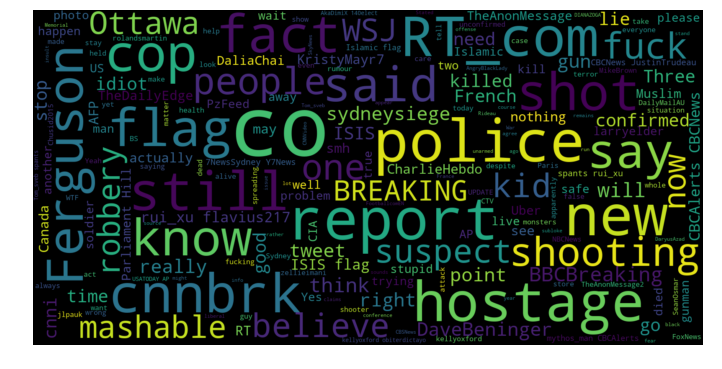

In [9]:
get_wordcloud(train,'deny')

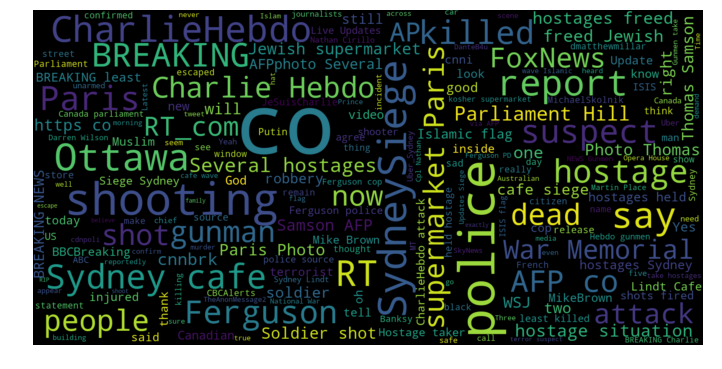

In [10]:
get_wordcloud(train,'support')

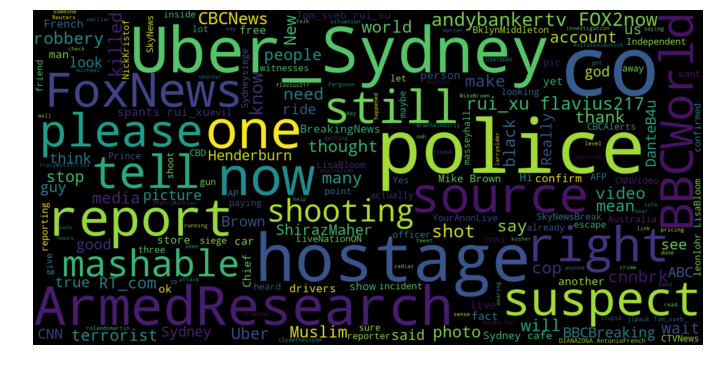

In [11]:
get_wordcloud(train,'query')

## error analysis on dev set

the prob column stands for the probabilities for 4 class, comment/support/deny/query

In [3]:
error = pd.read_csv('error.csv')

In [4]:
error

,text,prob,results,labels
0,#BreakingNews “@BBCBreaking: Germanwings Airbu...,[-0.7346664 -0.84832317 -2.493439 -4.648396 ],comment,support
1,@AirSmolik Im thinking structurql failure - qn...,[-0.28881264 -2.5841212 -2.7131014 -2.215909 ],comment,support
2,"@mashable Did you mean ""mayday"" here or ""..for...",[-0.6878598 -3.1261604 -2.308346 -1.0383518],comment,query
3,@tinkalee_12 @USATODAY @khjelmgaard #F4Phantom...,[-1.0112944 -0.5481741 -2.9792593 -4.9039254],support,comment
4,@marcepa49 The autopilot wasn't set to 100 fee...,[-0.31840378 -2.0131156 -2.1367323 -3.85947 ],comment,support
5,@jjauthor @gatewaypundit i knew that scarf he ...,[-0.19030498 -2.7334912 -2.5212212 -3.5777106 ],comment,support
6,@foxandfriends ok so.. There is no other news ...,[-0.6177387 -2.5643253 -2.5964804 -1.1733427],comment,query
7,@AirSmolik my thoughts exactly. rate is not un...,[-0.27914062 -2.0085459 -2.4203238 -3.887819 ],comment,support
8,@RichelleVHP Safety record is not perfect. htt...,[-0.46287626 -1.332583 -2.3504584 -4.473358 ],comment,support
9,Now hearing 148 passengers + crew on board the...,[-0.4317238 -1.3540164 -2.5508134 -4.241081 ],comment,support


In [11]:
for i in error['text'][error['labels'] == 'deny']:
    print(i)    

@Minus777 @flightradar24 @isobelroe The transponder did not say anything. No sqwak 7700.
“@BBCBreaking: Germanwings Airbus A320 crashes in French Alps near Digne http://t.co/BS79EGOyEj” flying today and THIS is not what I see :/
@mashable makes reference to 911 RE #Germanwings NOTHING BUT LIES at the cost of LIVES, BOYCOT website
@daxtonbrown @ShamNaarai @AnewTrackrecord a muslim convert? You start these lies.I hope he rots in his hell and you in a prison one if lying
@FRANCE24 reporter James André at French Civil Aviation Authority HQ: "#Germanwings plane did NOT report distress signal", no mayday.
.@RichelleVHP @France24_en @FRANCE24 Please take Hashtag #4U9525 for #Germanwings Plane crash. Thank you
“@mashable: Latest on #Germanwings crash: Pilots signaled 911 before dropping out of midair” dropping out of...no...irresponsible reporting.
@daxtonbrown GERMAN NEWS: Co-Pilot of Germanwings Airbus Was MUSLIM CONVERT …’Hero of Islamic State’? http://t.co/tvzf1CgmWX
@daxtonbrown @Welsh58 

In [13]:
error[error['labels'] == 'deny']

,text,prob,results,labels
22,@Minus777 @flightradar24 @isobelroe The transp...,[-0.27570623 -2.5297527 -2.1280355 -3.1649928 ],comment,deny
28,“@BBCBreaking: Germanwings Airbus A320 crashes...,[-0.17578949 -2.5233724 -2.7334151 -4.13393 ],comment,deny
30,@mashable makes reference to 911 RE #Germanwin...,[-0.30489355 -1.9773064 -2.2665105 -3.8784337 ],comment,deny
35,@daxtonbrown @ShamNaarai @AnewTrackrecord a mu...,[-0.18300393 -2.969644 -2.72533 -2.9879823 ],comment,deny
37,@FRANCE24 reporter James André at French Civil...,[-0.8275314 -0.7833763 -2.3419213 -4.6183248],support,deny
44,.@RichelleVHP @France24_en @FRANCE24 Please ta...,[-0.20193501 -2.365029 -2.7068121 -3.8096402 ],comment,deny
51,“@mashable: Latest on #Germanwings crash: Pilo...,[-0.32641488 -1.7450647 -2.4102354 -4.2639723 ],comment,deny
60,@daxtonbrown GERMAN NEWS: Co-Pilot of Germanwi...,[-0.47790688 -1.2929561 -2.4962611 -3.7692509 ],comment,deny
64,@daxtonbrown @Welsh58 @ShamNaarai @AnewTrackre...,[-0.81113684 -3.2158217 -2.4828687 -0.8392793 ],comment,deny
75,@mashable Signalled 911? Called 'Mayday' would...,[-0.8447639 -2.6983848 -2.2175956 -0.9310074],comment,deny


## note: add lexical approach for negation words/ textual entailment? (NEUTRAL, ENTAILMENT, or CONTRADICTION)

In [14]:
error[error['labels'] == 'query']

,text,prob,results,labels
2,"@mashable Did you mean ""mayday"" here or ""..for...",[-0.6878598 -3.1261604 -2.308346 -1.0383518],comment,query
6,@foxandfriends ok so.. There is no other news ...,[-0.6177387 -2.5643253 -2.5964804 -1.1733427],comment,query
17,Have mercy My heart breaks RT @BBCBreaking #Ge...,[-0.15582876 -2.629468 -2.8817983 -4.126233 ],comment,query
18,@rConflictNews @AlArabiya_Eng No crew???? Thos...,[-0.77502185 -3.2073324 -2.3282251 -0.9128633 ],comment,query
19,@BBCBreaking Pray for the grieving families. 🙏❤️,[-0.14013213 -3.028015 -2.8436024 -3.7243226 ],comment,query
23,@jjauthor @gatewaypundit Isn't Islam a wonderf...,[-0.39836994 -3.0459404 -2.480048 -1.623052 ],comment,query
31,.@mashable What does that even mean? Why would...,[-0.64996725 -2.4289546 -2.1063082 -1.3163135 ],comment,query
33,@rConflictNews @sahla_sing what happened,[-0.4986412 -3.1218336 -2.1811848 -1.4453623],comment,query
38,@foxandfriends This is a tragedy but why does ...,[-0.6335773 -2.763163 -2.3928585 -1.1556588],comment,query
47,@flightradar24 any idea why it'd flight so hig...,[-0.5399606 -2.7279456 -2.6165898 -1.2771751],comment,query


In [15]:
for i in error['text'][error['labels'] == 'query']:
    print(i) 

@mashable Did you mean "mayday" here or "..for emergency"?
@foxandfriends ok so.. There is no other news ? For an hour this is what we hear about ??
Have mercy My heart breaks RT @BBCBreaking #Germanwings confirm 144 ppl & 6 crew on FLT #4U9525 crash in French Alps  http://t.co/EnWBqbFRzn
@rConflictNews @AlArabiya_Eng No crew???? Those passengers were all on their own? Wtf!
@BBCBreaking Pray for the grieving families. 🙏❤️
@jjauthor @gatewaypundit Isn't Islam a wonderfully peaceful religion? I wonder how Iran will do with all of the peaceful centrifuges O gave?
.@mashable What does that even mean? Why would European pilots say 911 - an American emergency phone number? Nothing in article about that.
@rConflictNews @sahla_sing what happened
@foxandfriends This is a tragedy but why does a foreign airline in a foreign country have to totally co-opt all news?
@flightradar24 any idea why it'd flight so high?  It's a short flight, usually planes go at ~ 33,000 feet
@flightradar24 Any ATC avail

In [16]:
error[error['labels'] == 'comment']

,text,prob,results,labels
3,@tinkalee_12 @USATODAY @khjelmgaard #F4Phantom...,[-1.0112944 -0.5481741 -2.9792593 -4.9039254],support,comment
12,@BBCBreaking @BBCWorld What he couldn't be dri...,[-1.3100713 -3.3355072 -2.8492963 -0.45142895],query,comment
15,@thatjohn @RunwayGirl They made that call in F...,[-1.4123118 -3.0801349 -2.7612548 -0.43501484],query,comment
16,RT @flightradar24 #A320 #4U9525 initially clim...,[-1.249654 -0.44953227 -2.7099092 -4.7187033 ],support,comment
25,RT @NBCNews: #Germanwings passenger plane cras...,[-1.831728 -0.25111395 -2.9049742 -4.9365344 ],support,comment
34,RT @BBCBreaking Victims of #Germanwings crash ...,[-1.7538795 -0.28999043 -2.6745625 -4.636534 ],support,comment
36,#4U9525 From FL380 to FL110 in 8 min? That's a...,[-1.2464342 -0.56282413 -2.433949 -2.8970876 ],support,comment
41,@mashable:Latest on #Germanwings crash:Pilots ...,[-0.85263455 -0.71841574 -2.5327845 -4.998482 ],support,comment
45,King Felipe VI of Spain cancels state visit to...,[-3.1763575 -0.17861308 -2.4036794 -3.4594088 ],support,comment
49,@AirSmolik pilots may have been suffering a Hy...,[-1.0313313 -0.6070528 -2.4325457 -4.5374665],support,comment


In [18]:
for i in error['text'][error['labels'] == 'comment']:
    print(i) 

@tinkalee_12 @USATODAY @khjelmgaard #F4Phantom #crash #500mph #hit #ConcreteWall #DrEd https://t.co/wOhFk6288U From https://t.co/5O1bfTYft3
@BBCBreaking @BBCWorld What he couldn't be driven?
@thatjohn @RunwayGirl They made that call in French?
RT @flightradar24 #A320 #4U9525 initially climbed to 38k ft before starting to descend and lost signal at 6.8k ft http://t.co/LUWkDrBR9a
RT @NBCNews: #Germanwings passenger plane crashes in French Alps with 148 onboard http://t.co/OaZWx4f6BZ http://t.co/q9wuZeMChj
RT @BBCBreaking Victims of #Germanwings crash were most likely from Spain, Germany & Turkey, says President Hollande http://t.co/vMWyWONXXq
#4U9525 From FL380 to FL110 in 8 min? That's average rate of descent 3375 fpm! Than levelled off at FL068? What the hell was going on there?
@mashable:Latest on #Germanwings crash:Pilots signalled 911 b4dropping out of midair;airlineCEO calls this a"dark day"http://t.co/XesZCWfz2R
King Felipe VI of Spain cancels state visit to France after #Germanwi

In [17]:
error[error['labels'] == 'support']

,text,prob,results,labels
0,#BreakingNews “@BBCBreaking: Germanwings Airbu...,[-0.7346664 -0.84832317 -2.493439 -4.648396 ],comment,support
1,@AirSmolik Im thinking structurql failure - qn...,[-0.28881264 -2.5841212 -2.7131014 -2.215909 ],comment,support
4,@marcepa49 The autopilot wasn't set to 100 fee...,[-0.31840378 -2.0131156 -2.1367323 -3.85947 ],comment,support
5,@jjauthor @gatewaypundit i knew that scarf he ...,[-0.19030498 -2.7334912 -2.5212212 -3.5777106 ],comment,support
7,@AirSmolik my thoughts exactly. rate is not un...,[-0.27914062 -2.0085459 -2.4203238 -3.887819 ],comment,support
8,@RichelleVHP Safety record is not perfect. htt...,[-0.46287626 -1.332583 -2.3504584 -4.473358 ],comment,support
9,Now hearing 148 passengers + crew on board the...,[-0.4317238 -1.3540164 -2.5508134 -4.241081 ],comment,support
10,@AJENews @germanwings yes indeed :-(.,[-0.51042855 -1.243082 -2.4162598 -3.8161116 ],comment,support
11,@_icla_ @BBCBreaking This is sadly true...Supp...,[-0.20974761 -2.2862282 -2.677789 -3.9713933 ],comment,support
13,@daxtonbrown @ItsJustJill. It took long enough...,[-0.70077187 -2.508482 -2.2024758 -1.1651464 ],comment,support


In [19]:
for i in error['text'][error['labels'] == 'support']:
    print(i) 

#BreakingNews “@BBCBreaking: Germanwings Airbus A320 crashes in French Alps near Digne http://t.co/OYECGiYtfE” #BREAKING #planecrash
@AirSmolik Im thinking structurql failure - qnd then depressure etc cockpit window etc ? Trqgique
@marcepa49 The autopilot wasn't set to 100 feet. It was flown manually. FlightRadar24 has made that up.
@jjauthor @gatewaypundit i knew that scarf he was wearing in that photo meant trouble!
@AirSmolik my thoughts exactly. rate is not unusual but surely crew were aware of where they were & terrain... this'll be interesting.
@RichelleVHP Safety record is not perfect. http://t.co/928i3ln8bl @France24_en @FRANCE24
Now hearing 148 passengers + crew on board the #A320 that has crashed in southern French Alps. #GermanWings flight. @BBCWorld
@AJENews @germanwings yes indeed :-(.
@_icla_ @BBCBreaking This is sadly true...Support Israel, the apple of God's eye. #PJNET #CCOT #wakeupnow WORLD! #WakeUpAmerica John 3:16-17
@daxtonbrown @ItsJustJill. It took long enough to

mislabeled data distribution

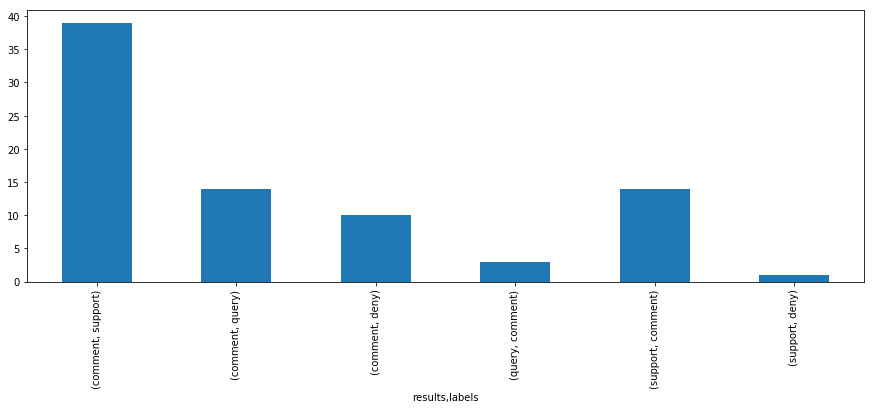

In [44]:
error['labels'].groupby(error['results']).value_counts().plot(kind = 'bar', figsize = (15,5))

## note: mostly cannot classify support/comment